<h1><center><bold>Ensemble Learning (Apprentissage ensembliste)
</bold>

By : Mohamed EL AOUMARI
mohammedelaoumari@gmail.com

L'importation des bibliotheques

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


Chargement de la dataset

In [171]:
'''Nous allons utiliser une partie de la base d'images cordelDB. Cette base est constituée de 490 images avec deux classe: Voiture et Bateau.
Pour l'extraction des caractéristiques, nous avons utilisé l'architecture Deep Learning VGG16 pour avoir une base de caractéristiques de taille 
1000x490. Les caractéristiques ont été sérialisées et sauvegardées.'''

X = pickle.load(open('Data/features_vgg16', 'rb')) # Features
Y = pickle.load(open('Data/labels', 'rb')) # Labels
print(f'La taille de la base de caractéristiques est: {X.shape}')
print(f'La taille des etiquettes est: {Y.shape}')

La taille de la base de caractéristiques est: (490, 1000)
La taille des etiquettes est: (490,)


In [172]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Données d'entrainement et de validation

print("X_train:", np.array(X_train).shape, "X_test:", np.array(X_test).shape)

X_train: (392, 1000) X_test: (98, 1000)


In [173]:
# Maintenant, nous allons évaluer l’utilisation séparée de trois algorithmes de Machine learning de base à savoir le SVM, le KNN et DT.

In [174]:
# Avant d'appliquer le SVM, il faut determiner le parametre C et le kernel

C_values = [0.1, 0.5, 1, 2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
kernels = ['linear', 'rbf', 'poly']

train_accuracy = {}
test_accuracy = {}

for k in kernels:
    h = []
    l = []
    for c in C_values:
        model = svm.SVC(C=c, kernel=k)
        model.fit(X_train, y_train)
        h.append(model.score(X_train, y_train))
        l.append(model.score(X_test, y_test))
    train_accuracy[k] = h
    test_accuracy[k] = l

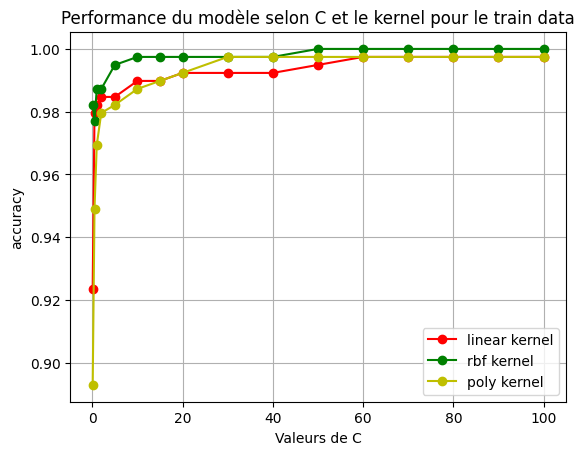

In [175]:
# Pour le train data
plt.plot(C_values, train_accuracy['linear'], marker = 'o', color = 'red', label = 'linear kernel')
plt.plot(C_values, train_accuracy['rbf'], marker = 'o', color = 'g' , label = 'rbf kernel')
plt.plot(C_values, train_accuracy['poly'], marker = 'o', color = 'y', label = 'poly kernel')
plt.xlabel('Valeurs de C')
plt.ylabel('accuracy')
plt.title('Performance du modèle selon C et le kernel pour le train data')
plt.legend()
plt.grid(True)
plt.show()

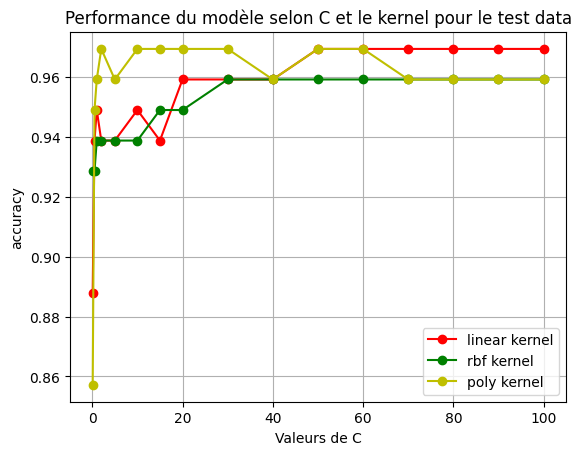

In [176]:
# Pour le test data
plt.plot(C_values, test_accuracy['linear'], marker = 'o', color = 'red', label = 'linear kernel')
plt.plot(C_values, test_accuracy['rbf'], marker = 'o', color = 'g' , label = 'rbf kernel')
plt.plot(C_values, test_accuracy['poly'], marker = 'o', color = 'y', label = 'poly kernel')
plt.xlabel('Valeurs de C')
plt.ylabel('accuracy')
plt.title('Performance du modèle selon C et le kernel pour le test data')
plt.legend()
plt.grid(True)
plt.show()

In [177]:
''' 
Conclusion: On observe que le modele SVM de C=60 et kernel='linear' nous donne la meilleure performance sur le train et le test data
Alors dans le reste du projet, on va utiliser ce modele.

'''

" \nConclusion: On observe que le modele SVM de C=60 et kernel='linear' nous donne la meilleure performance sur le train et le test data\nAlors dans le reste du projet, on va utiliser ce modele.\n\n"

In [178]:
# Pour le KNN, Nous devons determiner le n, pour cela on va suivre les memes demarches suivies pour le SVM.

N = [i for i in range(1,20)]
metric = ['euclidean', 'manhattan']
train_acc = {}
test_acc = {}
for m in metric:
    l_ = []
    h_ = []
    for i in N :
        model = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
        model.fit(X_train, y_train)
        l_.append(model.score(X_test, y_test))
        h_.append(model.score(X_train, y_train))
    train_acc[m] = h_
    test_acc[m] = l_

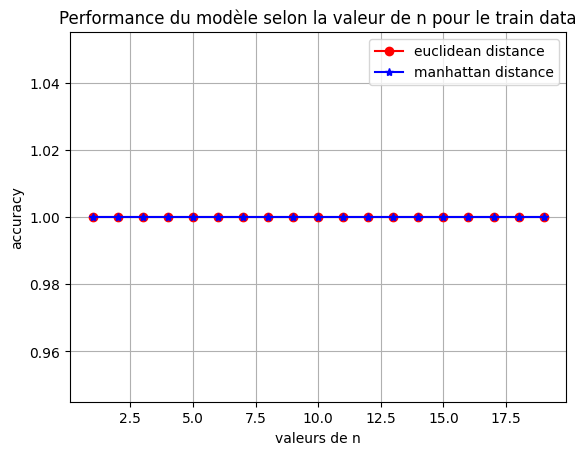

In [179]:
# Pour le train data
plt.plot(N, train_acc['euclidean'], marker = 'o', color = 'r', label = 'euclidean distance')
plt.plot(N, train_acc['manhattan'], marker = '*', color = 'b', label = 'manhattan distance')
plt.xlabel('valeurs de n')
plt.ylabel('accuracy')
plt.title('Performance du modèle selon la valeur de n pour le train data')
plt.legend()
plt.grid(True)
plt.show()


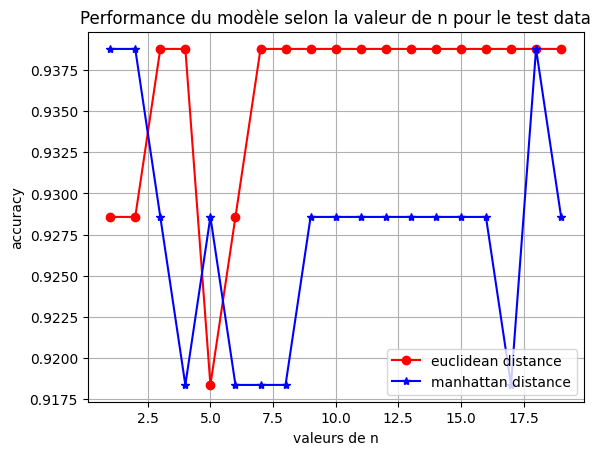

In [180]:
# Pour le test data
plt.plot(N, test_acc['euclidean'], marker = 'o', color = 'r', label = 'euclidean distance')
plt.plot(N, test_acc['manhattan'], marker = '*', color = 'b', label = 'manhattan distance')
plt.xlabel('valeurs de n')
plt.ylabel('accuracy')
plt.title('Performance du modèle selon la valeur de n pour le test data')
plt.legend()
plt.grid(True)
plt.show()

In [181]:
'''
On constate que le modele KNN(n = 3, weigths = 'distance', metric = 'euclidean') nous donne la meilleure performance sur l'ensemble 
d'entrainement et l'ensemble de validation.
Ils existent autres modeles qui donnent la même performance, mais puisque notre dataset ne dépasse pas 500 lignes, on prend la plus petite valeur
pour n et nous donne une performance acceptable sur les deux ensembles. 
Pour le reste du projet, on va utiliser ce modele.

'''


"\nOn constate que le modele KNN(n = 3, weigths = 'distance', metric = 'euclidean') nous donne la meilleure performance sur l'ensemble \nd'entrainement et l'ensemble de validation.\nIls existent autres modeles qui donnent la même performance, mais puisque notre dataset ne dépasse pas 500 lignes, on prend la plus petite valeur\npour n et nous donne une performance acceptable sur les deux ensembles. \nPour le reste du projet, on va utiliser ce modele.\n\n"

In [182]:
# Maintenant, on va appliquer le modele DT sur notre dataset:

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_test_pred1 = model1.predict(X_test)

print("\n========== Rapport sur l'ENSEMBLE DE TEST pour le modèle DT =============\n")
print(classification_report(y_test, y_test_pred1))



========== Rapport sur l'ENSEMBLE DE TEST pour le modèle DT =============

              precision    recall  f1-score   support

     obj_car       0.97      1.00      0.99        74
    obj_ship       1.00      0.92      0.96        24

    accuracy                           0.98        98
   macro avg       0.99      0.96      0.97        98
weighted avg       0.98      0.98      0.98        98



In [183]:
# SVM
model2 = svm.SVC(C=60, kernel='linear', probability = True)
model2.fit(X_train, y_train)
y_test_pred2 = model2.predict(X_test)

print("\n========== Rapport sur l'ENSEMBLE DE TEST pour le modèle SVM =============\n")
print(classification_report(y_test, y_test_pred2))


========== Rapport sur l'ENSEMBLE DE TEST pour le modèle SVM =============

              precision    recall  f1-score   support

     obj_car       0.97      0.99      0.98        74
    obj_ship       0.96      0.92      0.94        24

    accuracy                           0.97        98
   macro avg       0.96      0.95      0.96        98
weighted avg       0.97      0.97      0.97        98



In [184]:
# KNN
model3 = KNeighborsClassifier(n_neighbors=3, weights= 'distance', metric = 'euclidean')
model3.fit(X_train, y_train)
y_test_pred3 = model3.predict(X_test)

print("\n========== Rapport sur l'ENSEMBLE DE TEST pour le modèle KNN =============\n")
print(classification_report(y_test, y_test_pred3))


========== Rapport sur l'ENSEMBLE DE TEST pour le modèle KNN =============

              precision    recall  f1-score   support

     obj_car       0.96      0.96      0.96        74
    obj_ship       0.88      0.88      0.88        24

    accuracy                           0.94        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.94      0.94      0.94        98



In [185]:
print(f'DT accuracy: {model1.score(X_test, y_test)*100:.2f} %')
print(f'SVM accuracy: {model2.score(X_test, y_test)*100:.2f} %')
print(f'KNN accuracy: {model3.score(X_test, y_test)*100:.2f} %')

DT accuracy: 97.96 %
SVM accuracy: 96.94 %
KNN accuracy: 93.88 %


In [186]:
# Application des méthodes de Ensemble Learning
# Créer le modèle de vote majoritaire avec nos 3 modèles SVM, KNN et DT

modelVoteMajor = VotingClassifier([('DT', model1), ('SVM', model2), ('KNN', model3)])
modelVoteMajor.fit(X_train, y_train)
ac = modelVoteMajor.score(X_test, y_test)
print(f'Accuracy: {ac*100:.2f}%')

Accuracy: 96.94%


In [187]:
# On peut constater d’après les valeurs des accuracy, que le vote donne presque la même performance de SVM et DT, et plus que le modèle KNN.

In [188]:
modelVoteMajorPond = VotingClassifier([('SVM', model2), ('DT', model1), ('KNN', model3)], voting='soft', weights=[0.5, 0.4, 0.1])
modelVoteMajorPond.fit(X_train, y_train)
acc = modelVoteMajorPond.score(X_test, y_test)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 97.96%


In [189]:
# On peut constater d’après les valeurs des accuracy, que le vote pondéré à pu aussi dépasser les 3 modèles utilisés séparément.

Bagging

In [190]:
''' 
Le Bagging (ou l'agrégation Bootstrap Aggregating) est une technique d'ensemble learning qui se base sur l'entraînement 
de plusieurs modèles de manière indépendante sur des sous-ensembles aléatoires de l'ensemble d'entraînement.

'''
# On crée le modèle de bagging avec 100 modèles à base du modèle DT

modelBagg = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
modelBagg.fit(X_train, y_train)
print(f'Accuracy: {modelBagg.score(X_test, y_test)*100:.2f}')

Accuracy: 96.94


In [191]:
# On peut constater que le modele de bagging donne la même performance que le vote pondéré. Il est qussi améliorer la ferformance du modèle. 

Boosting

In [192]:
'''
Le boosting est une technique où les modèles sont formés séquentiellement, chaque modèle corrigeant les erreurs du modèle précédent.
Les poids des exemples mal classés sont ajustés à chaque étape pour donner plus d'importance aux exemples difficiles. 
Les modèles sont ensuite pondérés dans la prédiction finale en fonction de leurs performances.

'''

modelBoosting = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
modelBoosting.fit(X_train, y_train)
print(f'Accuracy_test: {modelBoosting.score(X_test, y_test)*100:.2f}')
print(f'Accuracy_train: {modelBoosting.score(X_train, y_train)*100:.2f}')

Accuracy_test: 97.96
Accuracy_train: 100.00


In [193]:
# On remarque que le taux de classification de AdaBoost est nettement supérieur que les modèles de machine learning utilisés.

Stacking

In [194]:
'''
Le Stacking, également appelé Stacked Generalization, consiste en la combinaison les prédictions de plusieurs modèles de base 
en utilisant un modèle de niveau supérieur, souvent appelé "meta-modèle" ou "meta-classifier".
'''
# On crée le modèle de Stacking à base des 3 Modèles SVM, KNN et DT
# Le méta-modèle qu'on va utiliser est la Régression logistique
modelStack = StackingClassifier([('SVM', model2), ('Tree', model1),('KNN', model3)],
                                final_estimator=LogisticRegression())
modelStack.fit(X_train, y_train)

StackingClassifier(estimators=[('SVM',
                                SVC(C=60, kernel='linear', probability=True)),
                               ('Tree', DecisionTreeClassifier()),
                               ('KNN',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression())

In [195]:
print(f'Accuracy_test pour Stacking: {modelStack.score(X_test, y_test)*100:.2f}')

Accuracy_test pour Stacking: 97.96


# Conclusion

L'ensemble learning est une approche puissante qui vise à améliorer la performance des modèles en combinant les prédictions de plusieurs modèles individuels. Cela permet de compenser les faiblesses de chaque modèle et d'obtenir une prédiction plus robuste

Dans notre cas, on a trouvé que les méthodes: Vote pondéré et Boosting nous donnent une amélioration du modèle au niveau d'ensemble d'entraînement et de validation.